In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [36]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12.0, 8.0)

# Linear Regression Model

**Preprocess the data**

In [37]:
# Load data
train = pd.read_csv('../datasets/clean/train_engineered.csv')

# Set features and target
X = train._get_numeric_data().drop(columns='SalePrice')
y = train['SalePrice']

# Scale the data
sc = StandardScaler()
Z = sc.fit_transform(X)

# Save column names
features = list(X.columns)

**Create Model**

In [38]:
# Create model
model = LinearRegression()

# Fit the model on training data
model.fit(Z, y)

LinearRegression()

Now that the models have been tested using train test split, I use the entire train dataset to train the model. This allows the model more data to train on, thus improving fit quality and potential for inference.

### Investigate coefficients

In [39]:
train.shape

(2049, 223)

In [40]:
def build_coef_df(features, model):
    coef = pd.DataFrame([features, model.coef_]).T.sort_values(1, ascending=False)
    coef.rename(columns={0:'feature', 1:'coefficient'}, inplace=True)
    coef.set_index('feature', drop=True, inplace=True)

    return coef

In [41]:
def get_numeric_features(coef):
    '''Identify non-binary features'''
    numeric_cols = []
    for col in coef.index:
        if len(train[col].unique()) > 2:
            numeric_cols.append(col)

    return numeric_cols

In [42]:
def get_binary_features(coef):
    '''Identify binary features'''
    binary_cols = []
    for col in coef.index:
        if len(train[col].unique()) <= 2:
            binary_cols.append(col)

    return binary_cols

In [43]:
coef = build_coef_df(features, model)

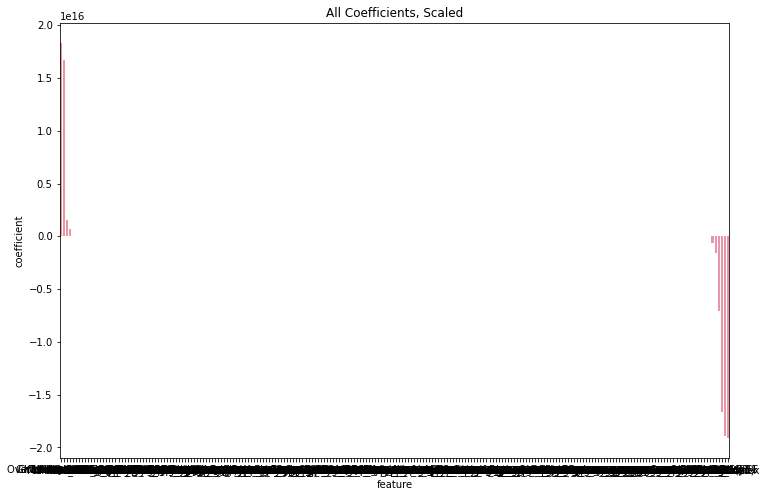

In [44]:
sns.barplot(x=coef.index, y='coefficient', data=coef)
plt.title('All Coefficients, Scaled');

**Interpretation:** Some features have abnormal coefficients. Identify them and drop so we can interpret the model.

## Features with large positive contribution

In [45]:
positive_contribution = (coef['coefficient'] > 40_000)
coef[positive_contribution]

,coefficient
feature,
Total Bsmt SF,1.83349e+16
Alley Pave,1.66767e+16
MS SubClass_90,1.54833e+15
Utilities_NoSewr,6.74035e+14


## Features with large negative contribution

In [46]:
negative_contribution =  (coef['coefficient'] < -20_000)
coef[negative_contribution]

,coefficient
feature,
MS Zoning_I (all),-6.74035e+14
Bldg Type_Duplex,-1.54833e+15
BsmtFin SF 2,-7.08963e+15
Has Alley,-1.66767e+16
BsmtFin SF 1,-1.88946e+16
Bsmt Unf SF,-1.91199e+16


In [47]:
# Drop the abnormal features
positive = [c for c in coef[positive_contribution].index]
negative = [c for c in coef[negative_contribution].index]

to_drop = positive + negative

In [48]:
to_drop

['Total Bsmt SF',
 'Alley Pave',
 'MS SubClass_90',
 'Utilities_NoSewr',
 'MS Zoning_I (all)',
 'Bldg Type_Duplex',
 'BsmtFin SF 2',
 'Has Alley',
 'BsmtFin SF 1',
 'Bsmt Unf SF']

In [49]:
train.drop(columns=to_drop, inplace=True)

# Re-train model
* Use refined train dataset
* Model trained on scaled data
    * Coefficients do not have direct dollar value relationship
    * They instead inform us how significant a feature is in determining the sale price of the home.

In [50]:
# Set features and target
X = train._get_numeric_data().drop(columns='SalePrice')
y = train['SalePrice']

# Scale the data
sc = StandardScaler()
Z = sc.fit_transform(X)

# Save column names
features = list(X.columns)

In [51]:
# Create model
model = LinearRegression()

# Fit the model on training data
model.fit(Z, y)

LinearRegression()

In [52]:
coef = build_coef_df(features, model)

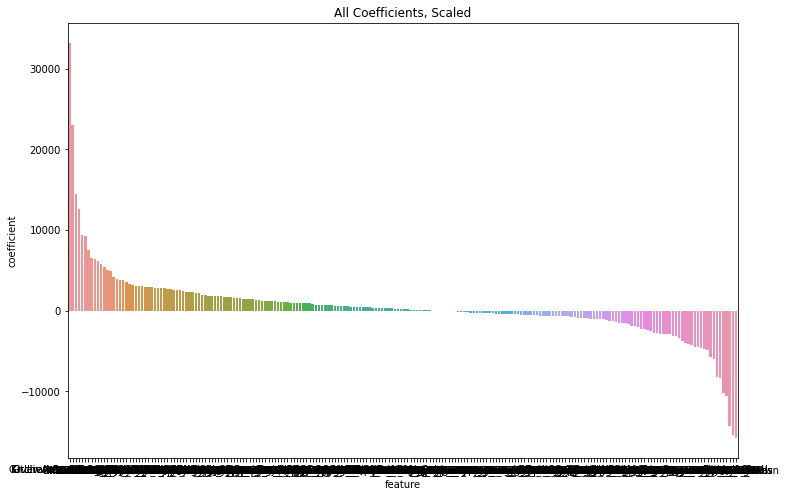

In [53]:
sns.barplot(x=coef.index, y='coefficient', data=coef)
plt.title('All Coefficients, Scaled');

**Interpretation:** Distribution looks normal now.

## Features with large contribution to target
**Numeric Features**

In [54]:
numeric_cols = get_numeric_features(coef)
numeric_cols[:5]

['Gr Liv Area Overall Qual',
 'Gr Liv Area Kitchen Qual',
 'Kitchen Qual Overall Qual',
 'Overall Qual Total Bsmt SF',
 'Overall Cond']

In [55]:
num_df = coef.loc[numeric_cols, :]

# Large positive contribution
num_df.head()

,coefficient
feature,
Gr Liv Area Overall Qual,33209.1
Gr Liv Area Kitchen Qual,22980.7
Kitchen Qual Overall Qual,14502.8
Overall Qual Total Bsmt SF,12608.6
Overall Cond,5814.84


In [56]:
# Large negative contribution
num_df.tail()

,coefficient
feature,
Bedroom AbvGr,-1300.13
Kitchen AbvGr,-2042.31
Gr Liv Area,-14239.8
Overall Qual,-15463.8
Kitchen Qual,-15789.7


**Binary Features**

In [57]:
binary_cols = get_binary_features(coef)
binary_cols[:5]

['MS Zoning_RL',
 'MS Zoning_RM',
 'Functional_Typ',
 'MS Zoning_FV',
 'Exterior 2nd_VinylSd']

In [58]:
binary_df = coef.loc[binary_cols, :]
binary_df.head()

,coefficient
feature,
MS Zoning_RL,9436.26
MS Zoning_RM,9311.13
Functional_Typ,7512.92
MS Zoning_FV,6536.13
Exterior 2nd_VinylSd,6390.51


In [59]:
binary_df.tail()

,coefficient
feature,
Neighborhood_Edwards,-5968.93
Neighborhood_NAmes,-8270.99
Neighborhood_OldTown,-8389.82
Exter Qual_Gd,-10138.6
Exter Qual_TA,-10594.1


# Train model on unscaled data
* For interpretability
* Extract specific dollar increase/decrease in home sale price as feature value changes.

In [60]:
# Set features and target
X = train._get_numeric_data().drop(columns='SalePrice')
y = train['SalePrice']

# Save column names
features = list(X.columns)

In [61]:
# Create model
model = LinearRegression()

# Fit the model on training data
model.fit(X, y)

LinearRegression()

### Investigate Coefficients

In [62]:
coef = build_coef_df(features, model)

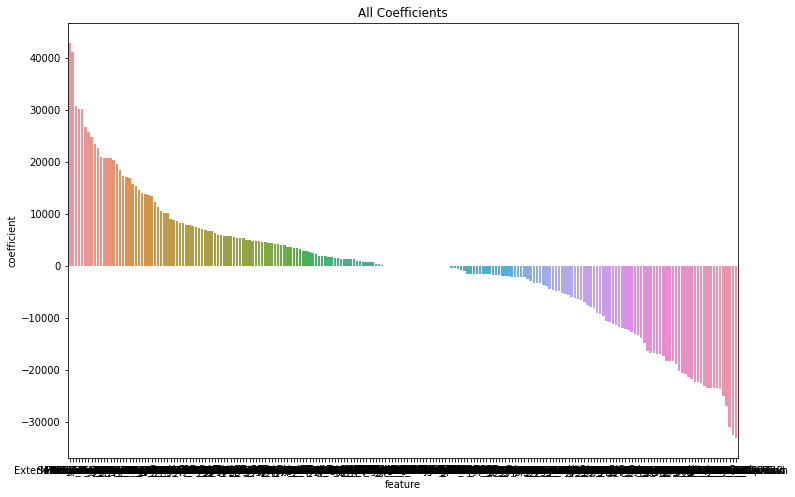

In [63]:
sns.barplot(x=coef.index, y='coefficient', data=coef)
plt.title('All Coefficients');

**Interpretation:** More features with large coefficients, compared to the model trained on scaled data. This is due to larger feature values in this model. The coefficients that are displayed below are useful for specifying specific dollar amounts relating increase/decrease in features to a change in home sale price. The coefficients from the scaled model are more useful in identifying the most significant features in predicting sale price. 

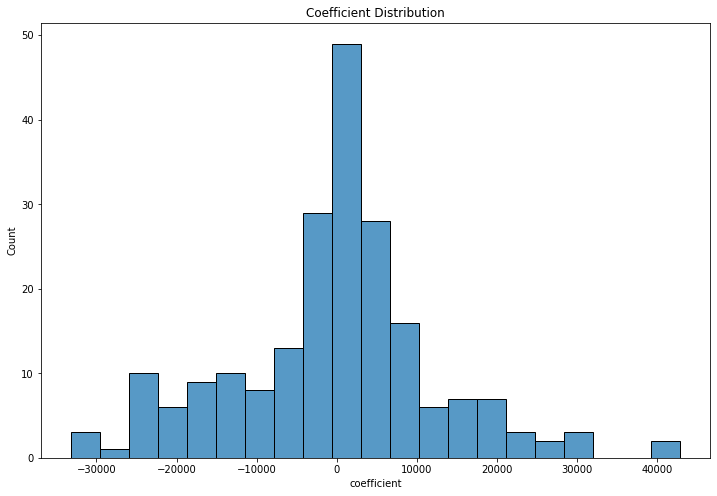

In [64]:
sns.histplot(coef['coefficient'])
plt.title('Coefficient Distribution');

**Interpretation:** Normal distribution.

## Features with large contribution to target
**Numeric Features**

In [65]:
numeric_cols = get_numeric_features(coef)
num_df = coef.loc[numeric_cols, :]

# Large positive contribution
num_df.head()

,coefficient
feature,
Bsmt Full Bath,7900.71
Full Bath,5445.42
Half Bath,5275.94
Overall Cond,5264.08
Fireplaces,4055.4


In [66]:
# Large negative contribution
num_df.tail()

,coefficient
feature,
Bedroom AbvGr,-1572.85
Exter Cond,-1660.32
Kitchen AbvGr,-9732.85
Overall Qual,-10879
Kitchen Qual,-23775.3


**Interpretation:** The model's interpretability has diminished for the features with interaction terms. A sacrifice was made between predictive accuracy and interpretability. Features such as 'kitchen quality' and 'overall quality' are subjective and thus not as useful for inference, so I am ok with this sacrifice in interpretability in order to train a more accurate model.

**Binary Features**

In [67]:
binary_cols = get_binary_features(coef)
binary_df = coef.loc[binary_cols, :]

# Large positive contribution
binary_df.head()

,coefficient
feature,
Exterior 2nd_AsphShn,42910.4
Sale Type_Con,41106.5
MS Zoning_RH,30659
MS Zoning_FV,30193.1
Functional_Typ,30180.3


In [68]:
# Large negative contribution
binary_df.tail()

,coefficient
feature,
Exterior 1st_BrkComm,-24999.7
Neighborhood_IDOTRR,-27047.7
Neighborhood_OldTown,-31004.9
Exterior 1st_AsphShn,-32592.1
Roof Style_Mansard,-33149.9
